In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import time
from scipy import stats

In [2]:
retail = pd.read_excel('Online Retail.xlsx')

Inspecting the Data

In [3]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [4]:
retail.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [5]:
retail.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
113117,545910,22418,10 COLOUR SPACEBOY PEN,24,2011-03-08 10:04:00,0.85,14586.0,United Kingdom
190860,553213,23101,SILVER STARS TABLE DECORATION,24,2011-05-16 09:49:00,0.83,13408.0,United Kingdom
299964,563184,23209,LUNCH BAG VINTAGE DOILY,4,2011-08-12 14:50:00,1.65,17516.0,United Kingdom
332643,566085,22995,TRAVEL CARD WALLET SUKI,1,2011-09-09 10:12:00,0.42,17841.0,United Kingdom
74036,542399,22113,GREY HEART HOT WATER BOTTLE,9,2011-01-27 15:38:00,3.75,15549.0,United Kingdom


In [6]:
retail.shape

(541909, 8)

Exploring missing Data

In [7]:
retail.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Exploring outliers

<Axes: xlabel='Quantity'>

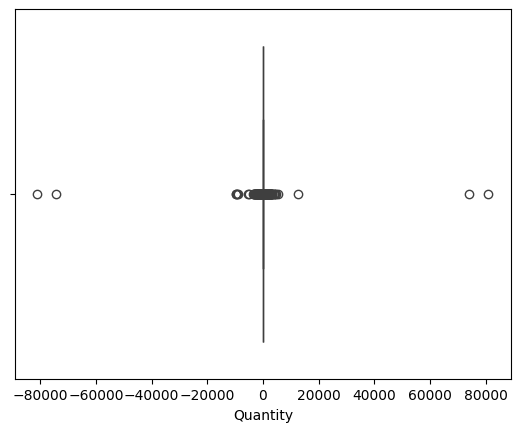

In [8]:
sns.boxplot(x=retail['Quantity'])

<Axes: xlabel='UnitPrice'>

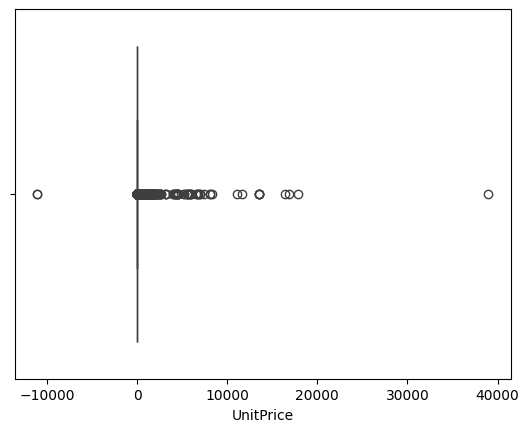

In [9]:
sns.boxplot(x=retail['UnitPrice'])

Dealing with null values

In [10]:
retail.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [11]:
retail[retail['Description'].isnull()].sample(20)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
332407,566067,20686,NaN,-95,2011-09-08 16:36:00,0.0,NaN,United Kingdom
280757,561501,21278,NaN,-1,2011-07-27 14:13:00,0.0,NaN,United Kingdom
137185,548098,21283,NaN,-15,2011-03-29 12:17:00,0.0,NaN,United Kingdom
137450,548161,20734,NaN,2,2011-03-29 13:40:00,0.0,NaN,United Kingdom
66518,541802,20854,NaN,-80,2011-01-21 14:45:00,0.0,NaN,United Kingdom
147828,549151,21664,NaN,20,2011-04-06 15:33:00,0.0,NaN,United Kingdom
130079,547403,85028L,NaN,-2,2011-03-22 17:05:00,0.0,NaN,United Kingdom
19999,538001,35958,NaN,10,2010-12-09 11:45:00,0.0,NaN,United Kingdom
162504,550502,84535A,NaN,320,2011-04-18 15:29:00,0.0,NaN,United Kingdom
323871,565369,37342,NaN,1,2011-09-02 15:02:00,0.0,NaN,United Kingdom


In [12]:
retail[retail['Description'].isnull() & (retail['UnitPrice'] > 0) & retail['CustomerID'].notnull()]


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


We observe a pattern where entries with null values in the "Description" field also tend to have a null "CustomerID" value and a "UnitPrice" of 0.0. Since a unit price of zero is invalid in this context, these records likely represent non-informative or erroneous data.

In [13]:
retail_cleaned = retail.drop(retail[retail['Description'].isnull()].index)
retail_cleaned = retail_cleaned.copy()


In [14]:
retail_cleaned.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133626
Country             0
dtype: int64

There are no entries with quantity set as 0 but there are entries that have a negative quantity value with an invoiceNo that start with C (This is standard in retail datasets: 'C' denotes a credit (refund) invoice, while others are sales invoices.) so we can add a column to know if it is a refund or not but first we should change it to str then proceed.

In [15]:
retail_cleaned[retail_cleaned['Quantity'] == 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [16]:
retail_cleaned[retail_cleaned['Quantity'] <= 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


We can see that we have 9288 entries as refund

In [17]:
returns = (retail_cleaned['Quantity'] < 0) & (retail_cleaned['InvoiceNo'].str.startswith('C'))
print("Returns with negative quantity and InvoiceNo starting with 'C':",returns.sum())


Returns with negative quantity and InvoiceNo starting with 'C': 9288


In [18]:
retail_cleaned['InvoiceNo'] = retail_cleaned['InvoiceNo'].astype(str)
retail_cleaned['IsRefund'] = retail_cleaned['InvoiceNo'].str.startswith('C')

retail_cleaned['IsRefund'].value_counts()

IsRefund
False    531167
True       9288
Name: count, dtype: int64

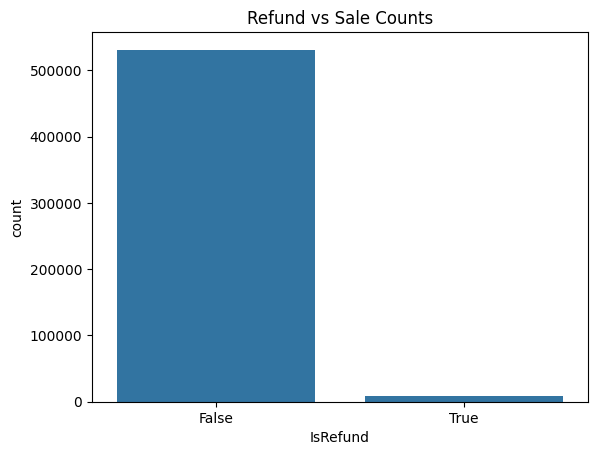

In [19]:
sns.countplot(x='IsRefund', data=retail_cleaned)
plt.title('Refund vs Sale Counts')
plt.show()

We can remove the entries that have Unit price less or equal to 0.0

In [20]:
retail_cleaned[retail_cleaned['UnitPrice'] <= 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,IsRefund
6391,536941,22734,amazon,20,2010-12-03 12:08:00,0.0,NaN,United Kingdom,False
6392,536942,22139,amazon,15,2010-12-03 12:08:00,0.0,NaN,United Kingdom,False
7313,537032,21275,?,-30,2010-12-03 16:50:00,0.0,NaN,United Kingdom,False
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,2010-12-05 14:02:00,0.0,12647.0,Germany,False
13217,537425,84968F,check,-20,2010-12-06 15:35:00,0.0,NaN,United Kingdom,False
...,...,...,...,...,...,...,...,...,...
535336,581213,22576,check,-30,2011-12-07 18:38:00,0.0,NaN,United Kingdom,False
536908,581226,23090,missing,-338,2011-12-08 09:56:00,0.0,NaN,United Kingdom,False
538504,581406,46000M,POLYESTER FILLER PAD 45x45cm,240,2011-12-08 13:58:00,0.0,NaN,United Kingdom,False
538505,581406,46000S,POLYESTER FILLER PAD 40x40cm,300,2011-12-08 13:58:00,0.0,NaN,United Kingdom,False


In [21]:
retail_cleaned = retail_cleaned[retail_cleaned['UnitPrice'] > 0]

In [22]:
retail_cleaned

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,IsRefund
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,False
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,False
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,False
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,False
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,False
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,False


Now moving on to CustomerID, we can drop them 

In [23]:
retail_cleaned.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     132603
Country             0
IsRefund            0
dtype: int64

In [24]:
retail_cleaned = retail_cleaned[retail_cleaned['CustomerID'].notna()].copy()

In [25]:
retail_cleaned

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,IsRefund
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,False
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,False
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,False
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,False
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,False
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,False


In [26]:
retail_cleaned.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
IsRefund       0
dtype: int64

In [27]:
retail_cleaned[retail_cleaned['IsRefund'] == True]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,IsRefund
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,True
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,True
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,True
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,True
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,True
...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,True
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom,True
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,True
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,True


Fixing Data Types

In [28]:
retail_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406789 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406789 non-null  object        
 1   StockCode    406789 non-null  object        
 2   Description  406789 non-null  object        
 3   Quantity     406789 non-null  int64         
 4   InvoiceDate  406789 non-null  datetime64[ns]
 5   UnitPrice    406789 non-null  float64       
 6   CustomerID   406789 non-null  float64       
 7   Country      406789 non-null  object        
 8   IsRefund     406789 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 28.3+ MB


In [29]:
retail_cleaned['CustomerID'] = retail_cleaned['CustomerID'].astype(int)

In [30]:
retail_cleaned['Country'] = retail_cleaned['Country'].astype('category')

Searching and fixing Duplicates

In [31]:
num_duplicates = retail_cleaned.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 5225


In [32]:
retail_cleaned = retail_cleaned.drop_duplicates()

Standardizing formats for Country column, we have some entries that have abreviations instead of real country name like EIRE == Ireland

In [33]:
retail_cleaned.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,IsRefund
159743,550359,20886,BOX OF 9 PEBBLE CANDLES,3,2011-04-18 10:41:00,1.95,17841,United Kingdom,False
339285,566585,72351A,SET/6 TURQUOISE BUTTERFLY T-LIGHTS,12,2011-09-13 14:06:00,2.10,16409,United Kingdom,False
221878,556288,82484,WOOD BLACK BOARD ANT WHITE FINISH,12,2011-06-10 09:23:00,6.75,13426,United Kingdom,False
308040,563935,15036,ASSORTED COLOURS SILK FAN,12,2011-08-21 16:24:00,0.83,15547,United Kingdom,False
216488,555845,21446,12 RED ROSE PEG PLACE SETTINGS,2,2011-06-07 13:19:00,1.25,17015,United Kingdom,False


In [34]:
retail_cleaned.Country.unique()

['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany', ..., 'USA', 'European Community', 'Bahrain', 'Malta', 'RSA']
Length: 37
Categories (37, object): ['Australia', 'Austria', 'Bahrain', 'Belgium', ..., 'USA', 'United Arab Emirates', 'United Kingdom', 'Unspecified']

In [35]:
retail_cleaned['Country'] = retail_cleaned['Country'].replace({
    'EIRE': 'Ireland',
    'USA': 'United States',
    'RSA': 'South Africa',
    'Unspecified': 'Unknown'
})


C:\Users\Othman Bouchentouf2\AppData\Local\Temp\ipykernel_16472\3378230334.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  retail_cleaned['Country'] = retail_cleaned['Country'].replace({
C:\Users\Othman Bouchentouf2\AppData\Local\Temp\ipykernel_16472\3378230334.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail_cleaned['Country'] = retail_cleaned['Country'].replace({


In [36]:
retail_cleaned.Country.unique()

['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany', ..., 'United States', 'European Community', 'Bahrain', 'Malta', 'South Africa']
Length: 37
Categories (37, object): ['Australia', 'Austria', 'Bahrain', 'Belgium', ..., 'United States', 'United Arab Emirates', 'United Kingdom', 'Unknown']

Detecting Outliers for Quantity and Unitprice columns

In [37]:
retail_cleaned.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,401564.000000,401564,401564.000000,401564.000000
mean,12.149911,2011-07-10 12:06:07.514567936,3.474410,15281.266797
min,-80995.000000,2010-12-01 08:26:00,0.001000,12346.000000
25%,2.000000,2011-04-06 15:02:00,1.250000,13939.000000
50%,5.000000,2011-07-29 15:32:30,1.950000,15145.000000
75%,12.000000,2011-10-20 11:58:00,3.750000,16788.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,249.512649,NaN,69.767501,1713.978947


<Axes: xlabel='UnitPrice'>

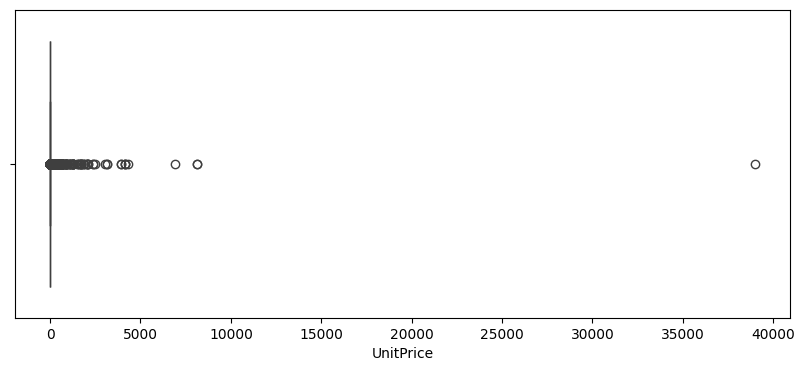

In [38]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=retail_cleaned['UnitPrice'])

Text(0.5, 1.0, 'Distribution of UnitPrice (log scale)')

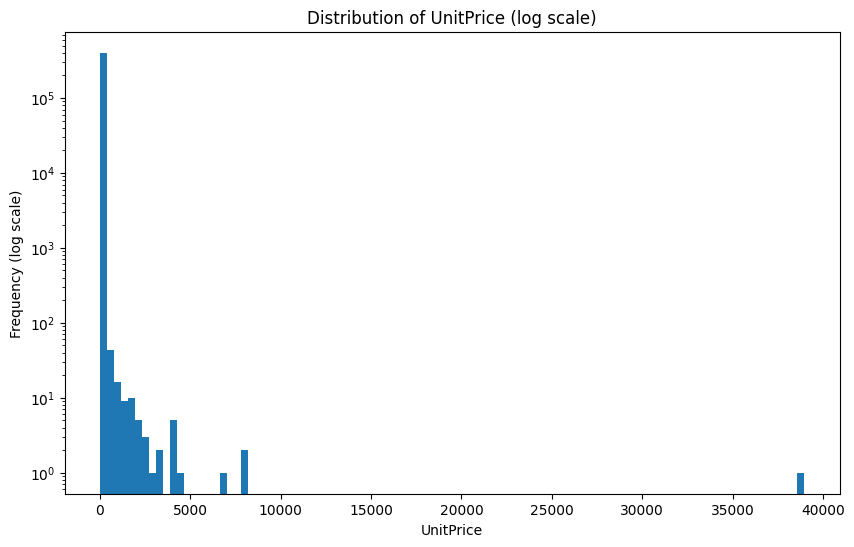

In [39]:
plt.figure(figsize=(10,6))
plt.hist(retail_cleaned['UnitPrice'], bins=100, log=True)
plt.xlabel('UnitPrice')
plt.ylabel('Frequency (log scale)')
plt.title('Distribution of UnitPrice (log scale)')

In [40]:
retail_cleaned[retail_cleaned['UnitPrice']> 649.50 ]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,IsRefund
45622,C540271,M,Manual,-1,2011-01-06 11:51:00,1126.00,12503,Spain,True
73446,C542348,M,Manual,-1,2011-01-27 12:09:00,1715.85,12539,Spain,True
88210,C543789,M,Manual,-1,2011-02-11 17:10:00,856.48,17450,United Kingdom,True
117052,C546325,M,Manual,-1,2011-03-11 10:15:00,1687.17,14911,Ireland,True
117053,C546327,M,Manual,-1,2011-03-11 10:18:00,1687.17,14911,Ireland,True
...,...,...,...,...,...,...,...,...,...
494745,C578269,CRUK,CRUK Commission,-1,2011-11-23 13:39:00,849.93,14096,United Kingdom,True
508459,579196,DOT,DOTCOM POSTAGE,1,2011-11-28 15:54:00,1526.76,14096,United Kingdom,False
508561,C579195,CRUK,CRUK Commission,-1,2011-11-28 15:54:00,987.14,14096,United Kingdom,True
528082,580727,DOT,DOTCOM POSTAGE,1,2011-12-05 17:17:00,1599.26,14096,United Kingdom,False


In [41]:
retail_cleaned[retail_cleaned['UnitPrice']< 649.50 ]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,IsRefund
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,False
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,False
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,False
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,False
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,False
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,False
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,False
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,False
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,False


We can see from the cell above that 649.50 appears to be a common price point for legitimate products like PICNIC BASKET WICKER 60 PIECES

In [42]:
retail_cleaned = retail_cleaned[retail_cleaned['UnitPrice'] < 649.50]

In [43]:
retail_cleaned

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,IsRefund
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,False
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,False
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,False
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,False
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,False
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,False
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,False
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,False
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,False


In [44]:
retail_cleaned.UnitPrice.value_counts()

UnitPrice
1.25      45813
1.65      36955
2.95      26796
0.85      26085
0.42      21777
          ...  
70.01         1
190.80        1
4.02          1
84.80         1
224.69        1
Name: count, Length: 573, dtype: int64

Now for Quantity

Text(0.5, 1.0, 'Distribution of Quantity (log scale)')

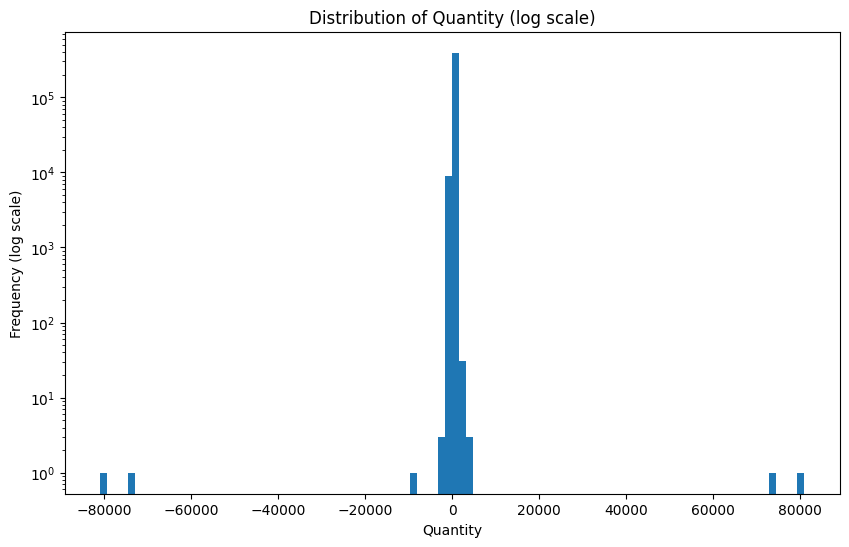

In [45]:
plt.figure(figsize=(10,6))
plt.hist(retail_cleaned['Quantity'], bins=100, log=True)
plt.xlabel('Quantity')
plt.ylabel('Frequency (log scale)')
plt.title('Distribution of Quantity (log scale)')

<Axes: xlabel='Quantity'>

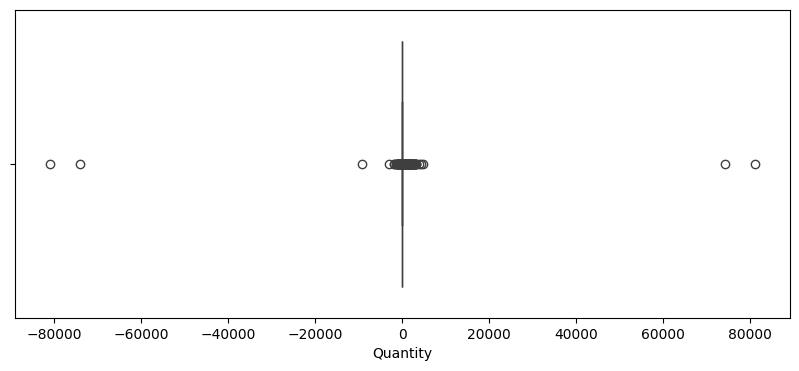

In [46]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=retail_cleaned['Quantity'])

We can see that the cell below shows that the very far values are not outliers which means they do represent real transactions so there is no need to perform any change in Quantity

In [47]:
retail_cleaned[(retail_cleaned['Quantity'] >60000) & (retail_cleaned['Quantity'] < 90000)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,IsRefund
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346,United Kingdom,False
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446,United Kingdom,False


In [48]:
retail_cleaned.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'IsRefund'],
      dtype='object')

I discovered a kind of pattern as shown in the cell below, where a customer buys something, then immediately refunds it for the exact same quantity, price, and product. It’s often accidental or test data, and keeping it will distort my analysis.

In [49]:
retail_cleaned[retail_cleaned['CustomerID']== 16446]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,IsRefund
194354,553573,22980,PANTRY SCRUBBING BRUSH,1,2011-05-18 09:52:00,1.65,16446,United Kingdom,False
194355,553573,22982,PANTRY PASTRY BRUSH,1,2011-05-18 09:52:00,1.25,16446,United Kingdom,False
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446,United Kingdom,False
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446,United Kingdom,True


Feature engineering

In [50]:
retail_cleaned['TotalPrice'] = (retail_cleaned['Quantity'] * retail_cleaned['UnitPrice']).round(3)

In [51]:
retail_cleaned

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,IsRefund,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,False,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,False,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,False,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,False,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,False,20.34
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,False,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,False,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,False,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,False,16.60


In [52]:
retail_cleaned['TransactionKey'] = (
    retail_cleaned['CustomerID'].astype(str) + '_' +
    retail_cleaned['StockCode'].astype(str) + '_' +
    retail_cleaned['UnitPrice'].astype(str) + '_' +
    retail_cleaned['TotalPrice'].abs().astype(str)
)

In [53]:
pair_counts = retail_cleaned.groupby(['TransactionKey', 'IsRefund']).size().unstack(fill_value=0)

In [54]:
valid_pairs = pair_counts[(pair_counts[False] >= 1) & (pair_counts[True] >= 1)].index
valid_pairs.nunique()

2982

In [55]:
retail_cleaned = retail_cleaned[~retail_cleaned['TransactionKey'].isin(valid_pairs)]
retail_cleaned = retail_cleaned.drop(columns=['TransactionKey'])

Some vizualisation

In [56]:
refund_counts = retail_cleaned['IsRefund'].value_counts().rename({True: 'Refund', False: 'Non-Refund'})
refund_ratio = refund_counts / refund_counts.sum()

print("Refund Counts:\n", refund_counts)
print("\nRefund Ratio:\n", refund_ratio)


Refund Counts:
 IsRefund
Non-Refund    387529
Refund          5734
Name: count, dtype: int64

Refund Ratio:
 IsRefund
Non-Refund    0.985419
Refund        0.014581
Name: count, dtype: float64


In [57]:
retail_cleaned.groupby('CustomerID')['InvoiceNo'].nunique().sort_values(ascending=False).head(10)

CustomerID
14911    228
12748    207
17841    139
15311    112
13089    111
14606    106
12971     86
14527     85
13408     79
14646     76
Name: InvoiceNo, dtype: int64

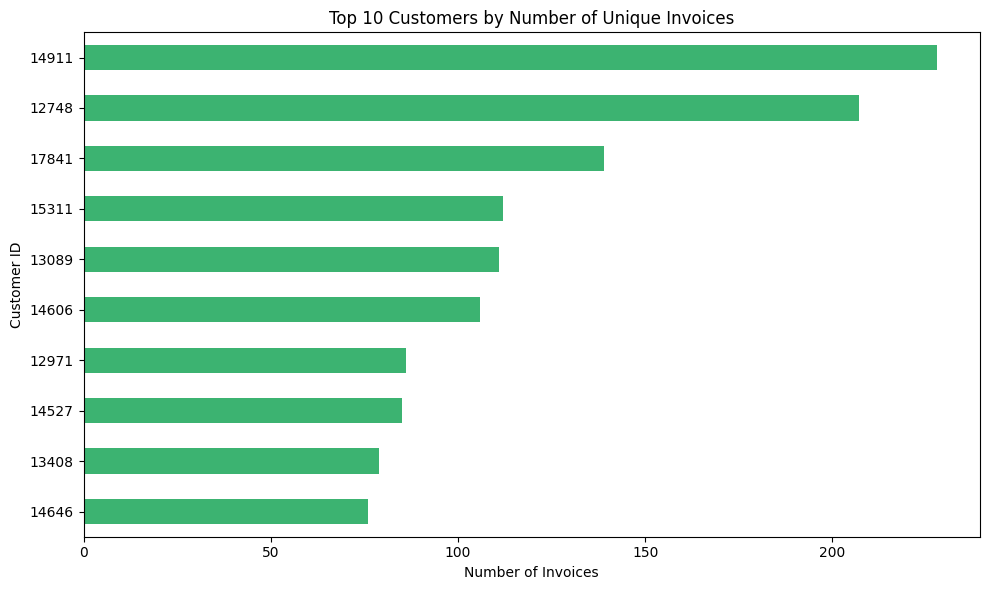

In [58]:
top_customers = retail_cleaned.groupby('CustomerID')['InvoiceNo'].nunique().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
top_customers.sort_values().plot(kind='barh', color='mediumseagreen')
plt.title('Top 10 Customers by Number of Unique Invoices')
plt.xlabel('Number of Invoices')
plt.ylabel('Customer ID')
plt.tight_layout()
plt.show()


In [59]:
#Most common products
retail_cleaned['Description'].value_counts().head(10)

Description
WHITE HANGING HEART T-LIGHT HOLDER    2017
REGENCY CAKESTAND 3 TIER              1750
JUMBO BAG RED RETROSPOT               1623
ASSORTED COLOUR BIRD ORNAMENT         1396
PARTY BUNTING                         1376
LUNCH BAG RED RETROSPOT               1304
SET OF 3 CAKE TINS PANTRY DESIGN      1186
POSTAGE                               1099
LUNCH BAG  BLACK SKULL.               1077
PACK OF 72 RETROSPOT CAKE CASES       1053
Name: count, dtype: int64

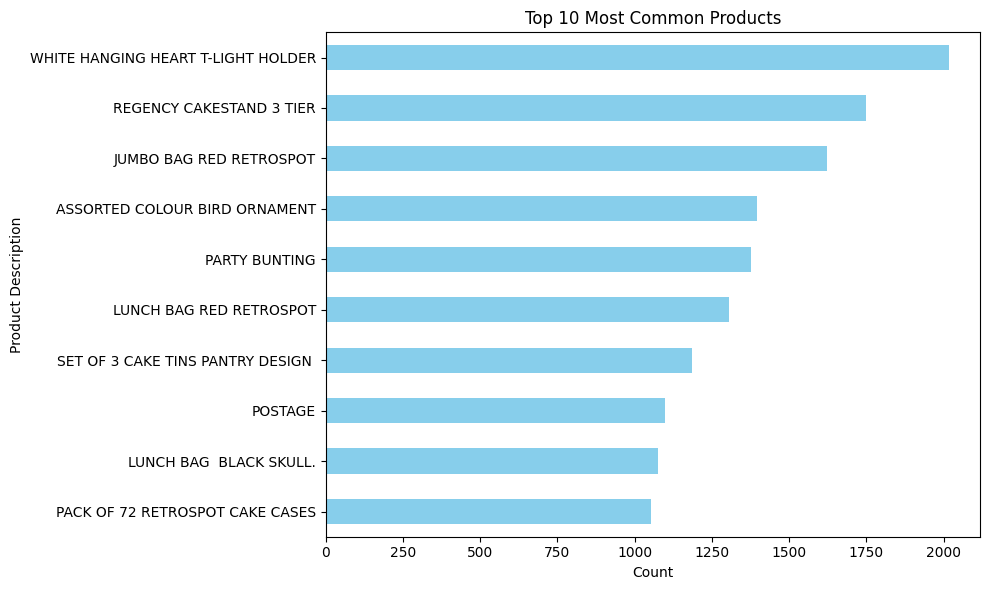

In [60]:
import matplotlib.pyplot as plt

top_products = retail_cleaned['Description'].value_counts().head(10)

plt.figure(figsize=(10, 6))
top_products.sort_values().plot(kind='barh', color='skyblue')
plt.title('Top 10 Most Common Products')
plt.xlabel('Count')
plt.ylabel('Product Description')
plt.tight_layout()
plt.show()


Text(0, 0.5, 'Frequency')

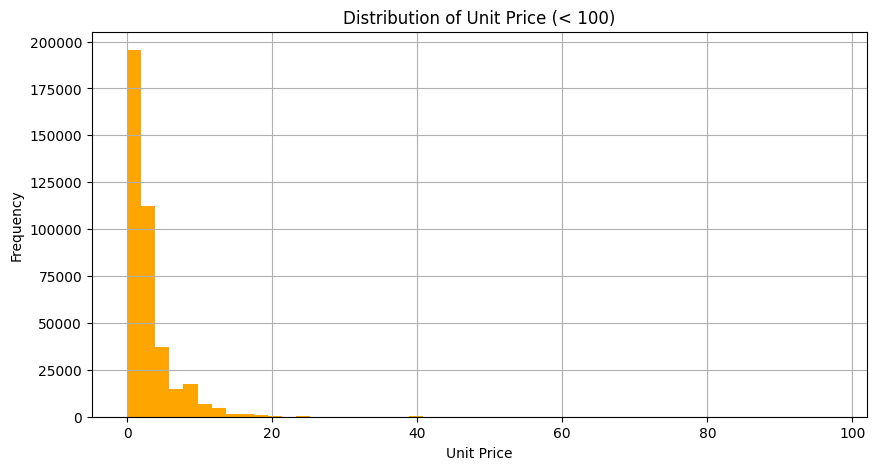

In [61]:
plt.figure(figsize=(10, 5))
retail_cleaned[retail_cleaned['UnitPrice'] < 100]['UnitPrice'].hist(bins=50, color='orange')
plt.title('Distribution of Unit Price (< 100)')
plt.xlabel('Unit Price')
plt.ylabel('Frequency')

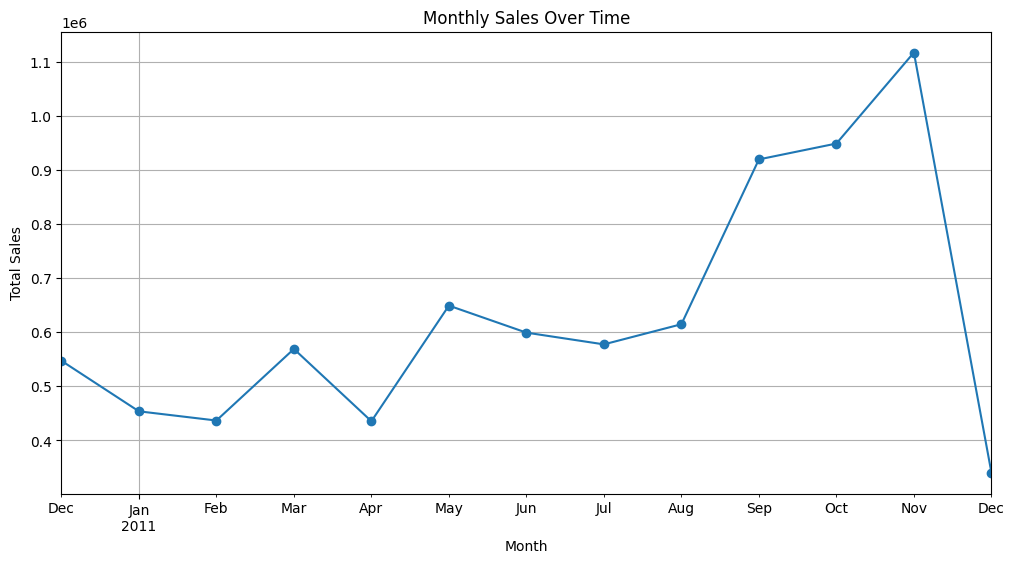

In [62]:
monthly_sales = retail_cleaned.groupby(retail_cleaned['InvoiceDate'].dt.to_period('M'))['TotalPrice'].sum()
monthly_sales.index = monthly_sales.index.to_timestamp()

plt.figure(figsize=(12, 6))
monthly_sales.plot(marker='o')
plt.title('Monthly Sales Over Time')
plt.ylabel('Total Sales')
plt.xlabel('Month')
plt.grid(True)

Customer Segmentation Using RFM and K-means clustering

In [63]:
import datetime as dt

snapshot_date = retail_cleaned['InvoiceDate'].max() + dt.timedelta(days=1)

rfm = retail_cleaned[~retail_cleaned['IsRefund']].groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'TotalPrice': 'sum'
}).reset_index()


rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

In [64]:
import numpy as np
from sklearn.preprocessing import StandardScaler

rfm_log = np.log1p(rfm[['Recency', 'Frequency', 'Monetary']])
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_log)


In [65]:
print(rfm[['Recency', 'Frequency', 'Monetary']].isna().sum())
print(rfm[['Recency', 'Frequency', 'Monetary']].min())


Recency      0
Frequency    0
Monetary     0
dtype: int64
Recency      1.0
Frequency    1.0
Monetary     2.9
dtype: float64


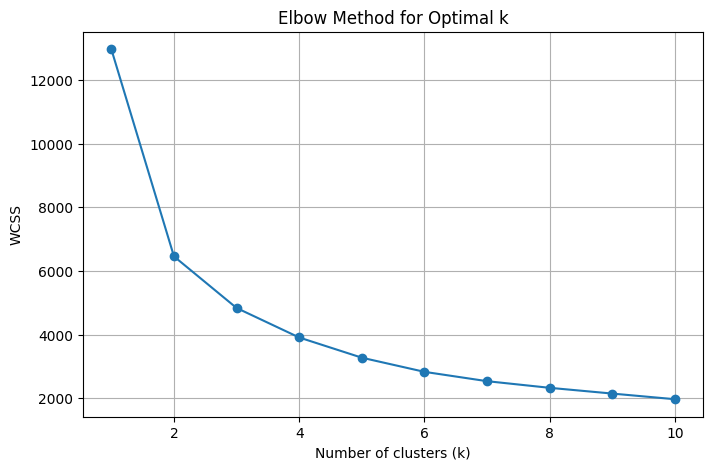

In [66]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []  


for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    wcss.append(kmeans.inertia_) 
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()


In [67]:
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)


In [68]:
rfm.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'CustomerID': 'count'
}).rename(columns={'CustomerID': 'NumCustomers'}).round(1)

,Recency,Frequency,Monetary,NumCustomers
Cluster,,,,
0,182.8,1.3,328.5,1598
1,12.2,13.7,7662.5,702
2,73.1,4.0,1622.8,1187
3,17.4,2.2,563.5,836


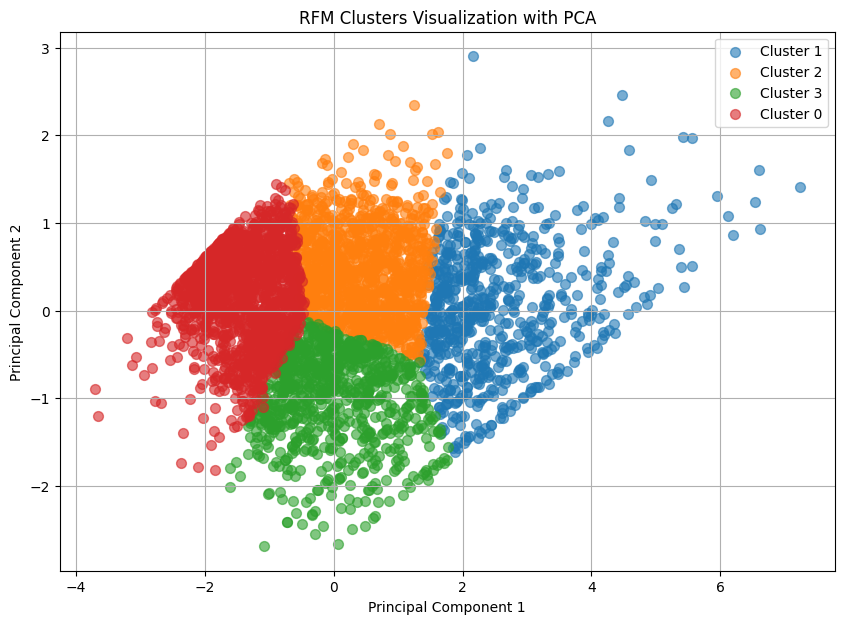

In [69]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
rfm_pca = pca.fit_transform(rfm_scaled)

import pandas as pd
rfm_plot_df = pd.DataFrame(rfm_pca, columns=['PC1', 'PC2'])
rfm_plot_df['Cluster'] = rfm['Cluster']

plt.figure(figsize=(10, 7))
for cluster in rfm_plot_df['Cluster'].unique():
    subset = rfm_plot_df[rfm_plot_df['Cluster'] == cluster]
    plt.scatter(subset['PC1'], subset['PC2'], label=f'Cluster {cluster}', alpha=0.6, s=50)

plt.title('RFM Clusters Visualization with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()


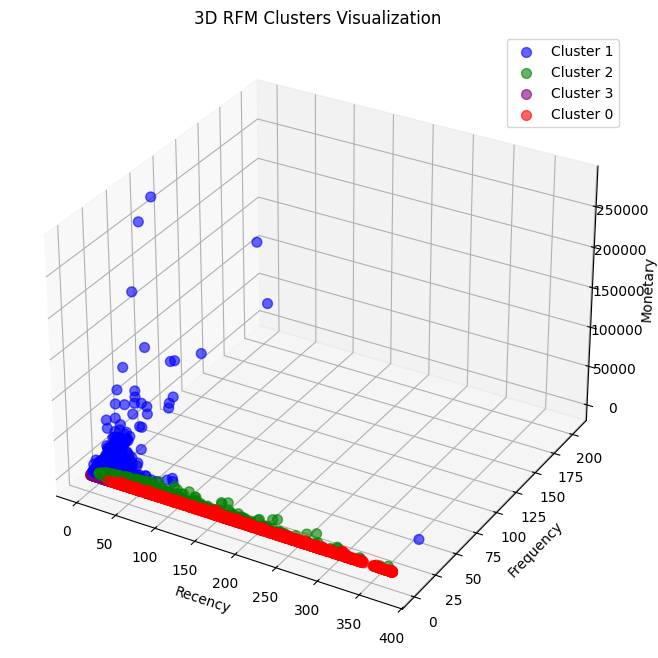

In [70]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

colors = ['red', 'blue', 'green', 'purple']

for cluster in rfm['Cluster'].unique():
    subset = rfm[rfm['Cluster'] == cluster]
    ax.scatter(subset['Recency'], subset['Frequency'], subset['Monetary'],
               s=50, alpha=0.6, label=f'Cluster {cluster}', 
               color=colors[cluster % len(colors)])

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.set_title('3D RFM Clusters Visualization')
ax.legend()
plt.show()


Labeling the clusters 

🟢 Champions → reward and retain

🟡 Loyal Customers → engage and upsell

🔵 New Customers → target with nurturing campaigns

🔴 Hibernating/At-Risk Customers → reactivation efforts or Divest/remove from active campaigns

In [71]:
segment_labels = {
    0: "At-Risk Customers",      # High Recency, Low Frequency/Monetary
    1: "Champions",              # Low Recency, High Frequency/Monetary
    2: "Loyal Customers",        # Moderate Recency, Good Frequency/Monetary
    3: "New Customers"           # Low Recency, Low Frequency/Monetary
}

In [72]:
rfm['Segment'] = rfm['Cluster'].map(segment_labels)


In [73]:
rfm.groupby('Segment').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'CustomerID': 'count'
}).rename(columns={'CustomerID': 'NumCustomers'}).round(1)


,Recency,Frequency,Monetary,NumCustomers
Segment,,,,
At-Risk Customers,182.8,1.3,328.5,1598
Champions,12.2,13.7,7662.5,702
Loyal Customers,73.1,4.0,1622.8,1187
New Customers,17.4,2.2,563.5,836


Final result

In [74]:
final_df = retail_cleaned[~retail_cleaned['IsRefund']].copy()

In [75]:
final_df = final_df.merge(
    rfm[['CustomerID', 'Segment' ,'Recency', 'Frequency', 'Monetary']],
    on='CustomerID',
    how='left'
)


In [76]:
final_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,IsRefund,TotalPrice,Segment,Recency,Frequency,Monetary
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,False,15.30,Champions,372,34,5064.27
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,False,20.34,Champions,372,34,5064.27
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,False,22.00,Champions,372,34,5064.27
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,False,20.34,Champions,372,34,5064.27
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,False,20.34,Champions,372,34,5064.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387524,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,False,10.20,New Customers,1,4,862.81
387525,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,False,12.60,New Customers,1,4,862.81
387526,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,False,16.60,New Customers,1,4,862.81
387527,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,False,16.60,New Customers,1,4,862.81


In [77]:
final_df.to_csv("final_retail_dataset.csv", index=False)

In [78]:
retail_cleaned.to_csv("retail_all.csv", index=False)